In [4]:
import pandas as pd

df=pd.read_csv(r"C:\Users\Pc\OneDrive\Desktop\Deep Learning\RNN TimeSeries\Microsoft_Stock - Microsoft_Stock.csv")
df

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012


In [5]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df['Date']=pd.to_datetime(df['Date'])
df=df.sort_values('Date')
df.head()

,Date,Open,High,Low,Close,Volume
0,2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
1,2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2,2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
3,2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
4,2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


In [8]:
df=df[['Open','High','Low','Close','Volume']]
df

,Open,High,Low,Close,Volume
0,40.60,40.76,40.31,40.72,36865322
1,40.66,40.74,40.12,40.29,37487476
2,40.34,41.78,40.18,41.55,39223692
3,41.61,41.91,41.31,41.53,28809375
4,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...
1506,235.30,236.94,231.57,232.34,34061853
1507,231.55,236.71,231.55,236.48,25479853
1508,236.59,236.80,231.88,235.24,25227455
1509,233.53,233.85,231.10,231.85,24792012


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(df)

In [10]:
import numpy as np
def create_sequences(data,window_size=60):
    x,y=[],[]
    for i in range(window_size,len(data)): # window_size=length of sequence
        x.append(data[i-window_size:i]) # i=60 :aadyathe 60 values oru  sequence ayi store cheyyum :loop continue cheyth pokum (i=60,60-60=0-->loop-->0-60=60--its first sequence -->continue the work)
        y.append(data[i,3]) # i=60 rows and 3rd column(Close=TARGET COLUMN)
    return np.array(x),np.array(y)

x,y=create_sequences(scaled_data,window_size=60)

In [11]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=False)  #shuffle=false : random aayi x_train il ninnum,y_trainil nimmum ore values varan sadhyathayund so ath illathakkan vendiyanu shuffle =false pass cheyyunnath

In [12]:
print(x_train.shape)
print(y_train.shape)

(1160, 60, 5)
(1160,)


In [13]:
print(x_test.shape)
print(y_test.shape)

(291, 60, 5)
(291,)


Model Architecture

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense

model=Sequential([SimpleRNN(50,return_sequences=False,input_shape=(x_train.shape[1],x_train.shape[2])), #shape[1]=60 , shape[2]=5 -->x_train.shape
                  Dense(1)])

c:\Users\Pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])

In [17]:
model.fit(x_train,
          y_train,
          epochs=5,
          batch_size=32,
          validation_split=0.1)

Epoch 1/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.1977e-05 - mae: 0.0069 - val_loss: 3.5653e-04 - val_mae: 0.0136
Epoch 2/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.3899e-05 - mae: 0.0075 - val_loss: 4.4959e-04 - val_mae: 0.0164
Epoch 3/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.4706e-05 - mae: 0.0070 - val_loss: 2.8336e-04 - val_mae: 0.0112
Epoch 4/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.0550e-05 - mae: 0.0062 - val_loss: 2.4577e-04 - val_mae: 0.0109
Epoch 5/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.7490e-05 - mae: 0.0068 - val_loss: 2.7158e-04 - val_mae: 0.0110


In [18]:
predicted=model.predict(x_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [19]:
y_test

array([0.68202247, 0.70024426, 0.70151441, 0.72501221, 0.70420127,
       0.70552027, 0.70063508, 0.7086468 , 0.71783097, 0.71807523,
       0.70410357, 0.67562286, 0.63800684, 0.62423058, 0.6344895 ,
       0.57591597, 0.59462628, 0.64728872, 0.60683928, 0.63634587,
       0.61543723, 0.5924768 , 0.53898388, 0.58930142, 0.55368832,
       0.48251099, 0.57909135, 0.46472887, 0.51919883, 0.48905716,
       0.50034196, 0.4741573 , 0.46746458, 0.52784563, 0.52090865,
       0.56580362, 0.5344895 , 0.58593063, 0.57361993, 0.54626282,
       0.5616512 , 0.55466536, 0.61055203, 0.60185638, 0.6098681 ,
       0.60991695, 0.61172447, 0.65173425, 0.64284319, 0.66805081,
       0.67567171, 0.65837811, 0.62300928, 0.65085491, 0.64059599,
       0.65588666, 0.65344406, 0.63273083, 0.66995603, 0.67865169,
       0.65598437, 0.67684416, 0.68622374, 0.69491939, 0.7000977 ,
       0.70537372, 0.71543723, 0.69477284, 0.68128969, 0.68510015,
       0.69794822, 0.70649731, 0.70024426, 0.71016121, 0.69926

In [20]:
predicted

array([[0.6115708 ],
       [0.63828456],
       [0.6457518 ],
       [0.63732624],
       [0.6450136 ],
       [0.6460299 ],
       [0.6375249 ],
       [0.6278325 ],
       [0.63318765],
       [0.64742965],
       [0.6684474 ],
       [0.65287626],
       [0.6287917 ],
       [0.5670529 ],
       [0.5795144 ],
       [0.57119304],
       [0.5100588 ],
       [0.49908105],
       [0.5447543 ],
       [0.54837537],
       [0.567701  ],
       [0.5856395 ],
       [0.5468758 ],
       [0.5308608 ],
       [0.532374  ],
       [0.5223491 ],
       [0.4791758 ],
       [0.4900445 ],
       [0.46130112],
       [0.46914402],
       [0.45968848],
       [0.49042976],
       [0.48141742],
       [0.46304607],
       [0.4714871 ],
       [0.50497603],
       [0.5169883 ],
       [0.5297482 ],
       [0.53070676],
       [0.5423049 ],
       [0.53518414],
       [0.5135179 ],
       [0.5210542 ],
       [0.53150916],
       [0.5691677 ],
       [0.56162953],
       [0.5520642 ],
       [0.555

In [21]:
real_dummy=np.zeros((len(y_test),scaled_data.shape[1]))
real_dummy[:,3]=y_test

real_close=scaler.inverse_transform(real_dummy)[:,3]
real_close

array([179.9 , 183.63, 183.89, 188.7 , 184.44, 184.71, 183.71, 185.35,
       187.23, 187.28, 184.42, 178.59, 170.89, 168.07, 170.17, 158.18,
       162.01, 172.79, 164.51, 170.55, 166.27, 161.57, 150.62, 160.92,
       153.63, 139.06, 158.83, 135.42, 146.57, 140.4 , 142.71, 137.35,
       135.98, 148.34, 146.92, 156.11, 149.7 , 160.23, 157.71, 152.11,
       155.26, 153.83, 165.27, 163.49, 165.13, 165.14, 165.51, 173.7 ,
       171.88, 177.04, 178.6 , 175.06, 167.82, 173.52, 171.42, 174.55,
       174.05, 169.81, 177.43, 179.21, 174.57, 178.84, 180.76, 182.54,
       183.6 , 184.68, 186.74, 182.51, 179.75, 180.53, 183.16, 184.91,
       183.63, 185.66, 183.43, 183.51, 181.57, 181.81, 181.4 , 183.25,
       182.83, 184.91, 185.36, 182.92, 187.2 , 188.36, 189.8 , 196.84,
       186.27, 187.74, 188.94, 193.57, 194.24, 196.32, 195.15, 200.57,
       201.91, 197.84, 200.34, 196.33, 198.44, 203.51, 204.7 , 206.26,
       210.7 , 208.25, 212.83, 214.32, 213.67, 207.07, 208.35, 208.04,
      

In [23]:
y_pred= model.predict(x_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [29]:
real_dummy_pred = np.zeros((len(y_pred), scaled_data.shape[1]))
real_dummy_pred[:, 3] = predicted.flatten()

pred_close = scaler.inverse_transform(real_dummy_pred)[:, 3]
pred_close

array([165.47853775, 170.94685025, 172.4753882 , 170.75068144,
       172.32427794, 172.5323184 , 170.79134761, 168.80730708,
       169.90351229, 172.81884834, 177.12117772, 173.93376999,
       169.00365892, 156.36572879, 158.91659446, 157.21321517,
       144.6990405 , 142.45188999, 151.8012106 , 152.54243785,
       156.49839103, 160.1704009 , 152.23547111, 148.95720201,
       149.26696279, 147.2148647 , 138.3772875 , 140.60211005,
       134.71833888, 136.32378018, 134.38823281, 140.68097167,
       138.83614537, 135.07553133, 136.80341037, 143.65859419,
       146.11750039, 148.72945682, 148.92567444, 151.2998076 ,
       149.84219448, 145.40711745, 146.94979643, 149.08992526,
       156.79862278, 155.25556556, 153.29753772, 153.95605392,
       158.75907864, 160.40101333, 161.31758217, 163.00268426,
       163.74156891, 158.72645297, 160.0074678 , 161.2483655 ,
       160.30335596, 165.2193992 , 165.22193703, 160.3527093 ,
       165.51187107, 164.78340614, 164.3340163 , 167.68

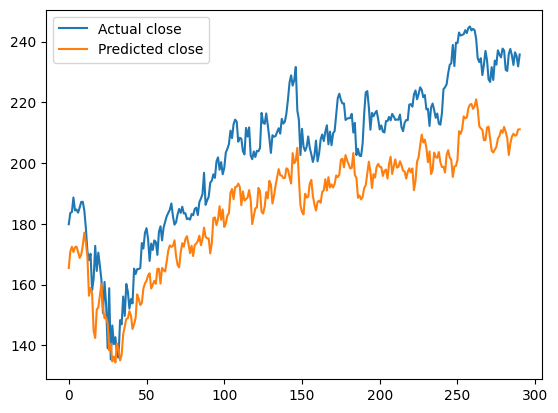

In [30]:
import matplotlib.pyplot as plt

plt.plot(real_close,label="Actual close")
plt.plot(pred_close,label="Predicted close")
plt.legend()
plt.show()